<h2> Demo: Implementing Principle Component Analysis </h2>

In this demo, you will be shown how to implement PCA using Python.

### Step 1: Import required libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Step 2: Load iris.csv file

In [9]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']  
df = pd.read_csv('iris.csv', names=names)  
df.head()

sepal-length  sepal-width  petal-length  petal-width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

### Step 3: Standardize the data

In [11]:
features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Step 4: Projection of PCA to 2D 

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767

### Step 5: Concatenating DataFrame along axis = 1

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

### Step 6: Visualize 2D projection

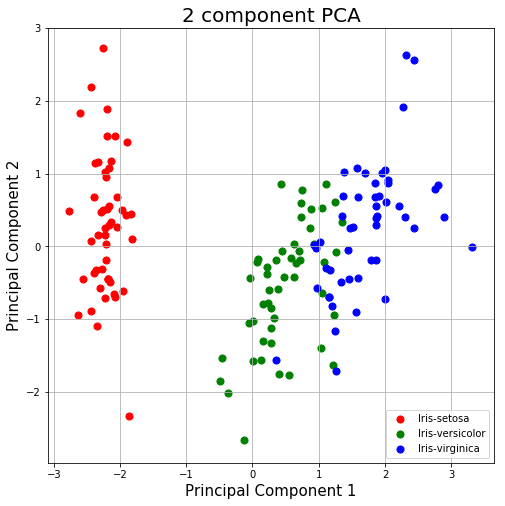

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Step 7: Calculating explained ratio

In [22]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])